# Explore here

In [2]:
# Your code here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
datos_c=pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/data-preprocessing-project-tutorial/main/AB_NYC_2019.csv")
datos_c.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [3]:
#guardado en la capeta
datos_c.to_csv("../data/raw/datos.csv",index=False)

In [4]:
#1-planteamiento del problema y recopilacion de datos 
#2-exploracion y limpieza de los datos
#3-analisis de variables univariantes
#4-analisis de variables multivariables
#5-ing. de caracteristicas 
#6-seleccion de caracteristicas


#entonces queremos saber el precio de una propiedad de airbnb en NY



In [5]:
#ahora limpiaremos los datos
datos_c.shape #nos dice la dimencion del DF
datos_c.info()
datos_c.duplicated("id").sum()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

np.int64(0)

In [6]:
#elminar columnas inutiles
datos_c.drop(['id',"name","host_name","last_review","reviews_per_month"],axis=1,inplace=True)
datos_c.head(10)

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,6,365
1,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2,355
2,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1,365
3,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,1,194
4,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,1,0
5,7322,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,1,129
6,7356,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,1,0
7,8967,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,1,220
8,7490,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,1,0
9,7549,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,4,188


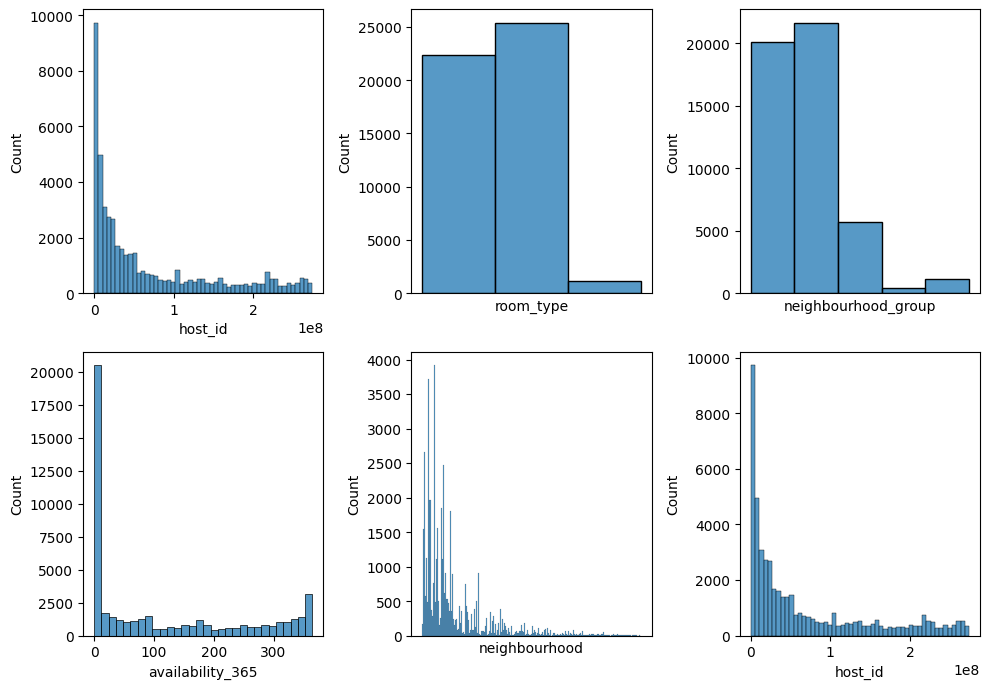

In [7]:
#analisis de variables univariantes
import seaborn as sns

fig, axis=plt.subplots(2,3,figsize=(10,7))
sns.histplot(ax=axis[0,0],data=datos_c,x="host_id")
sns.histplot(ax=axis[0,1],data=datos_c,x="room_type").set_xticks([])
sns.histplot(ax=axis[1,0],data=datos_c,x="availability_365")
sns.histplot(ax=axis[1,1],data=datos_c,x="neighbourhood").set_xticks([])
sns.histplot(ax=axis[0,2],data=datos_c,x="neighbourhood_group").set_xticks([])
sns.histplot(ax=axis[1,2],data=datos_c,x="host_id")

plt.tight_layout()
plt.show()

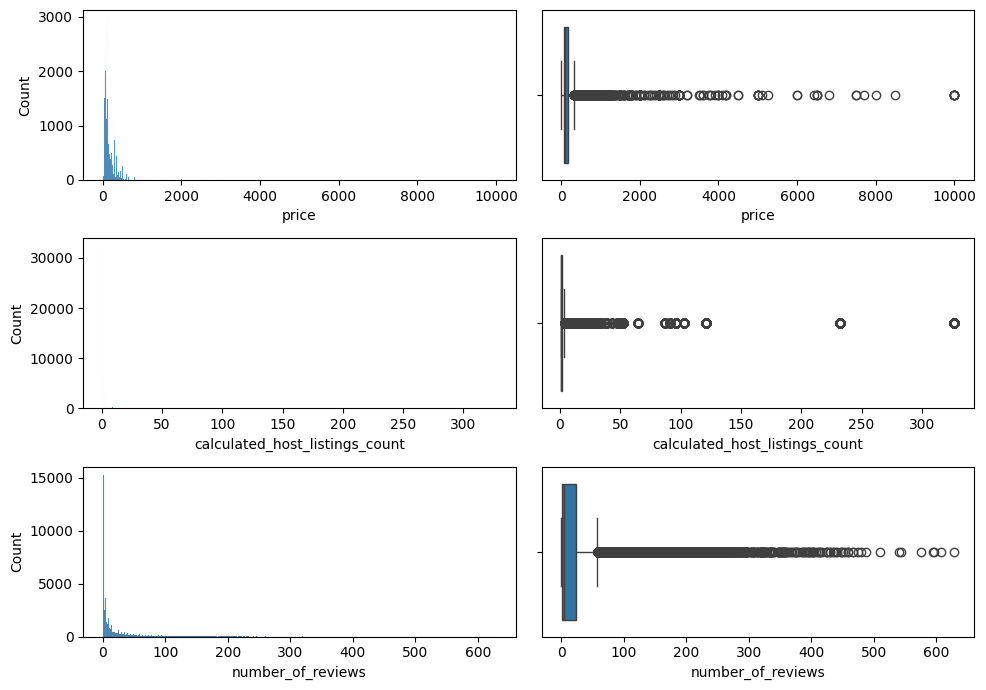

In [8]:
#analisis de variables numericas 
fig, axis=plt.subplots(3,2,figsize=(10,7))
sns.histplot(ax=axis[0,0],data=datos_c,x="price")
sns.boxplot(ax=axis[0,1],data=datos_c,x="price")

sns.histplot(ax=axis[1,0],data=datos_c,x="calculated_host_listings_count")
sns.boxplot(ax=axis[1,1],data=datos_c,x="calculated_host_listings_count")

sns.histplot(ax=axis[2,0],data=datos_c,x="number_of_reviews")
sns.boxplot(ax=axis[2,1],data=datos_c,x="number_of_reviews")
plt.tight_layout()
plt.show()


In [9]:
#analisis mutivariable
#analisis numerico numerico 


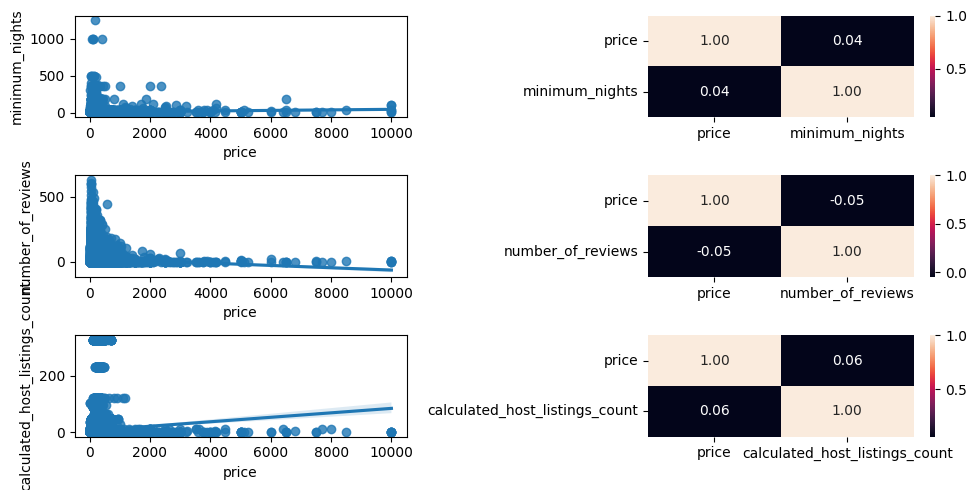

In [10]:
fig,axis=plt.subplots(3,2,figsize=(10,5))
sns.regplot(data=datos_c,x="price",y="minimum_nights",ax=axis[0,0])
sns.heatmap(data=datos_c[["price","minimum_nights"]].corr(),annot=True,fmt=".2f",ax=axis[0,1])

sns.regplot(data=datos_c,x="price",y="number_of_reviews",ax=axis[1,0])
sns.heatmap(data=datos_c[["price","number_of_reviews"]].corr(),annot=True,fmt=".2f",ax=axis[1,1])

sns.regplot(data=datos_c,x="price",y="calculated_host_listings_count",ax=axis[2,0])
sns.heatmap(data=datos_c[["price","calculated_host_listings_count"]].corr(),annot=True,fmt=".2f",ax=axis[2,1])
plt.tight_layout()
plt.show()
#se ve una baja relacion lineal en los tres graficos

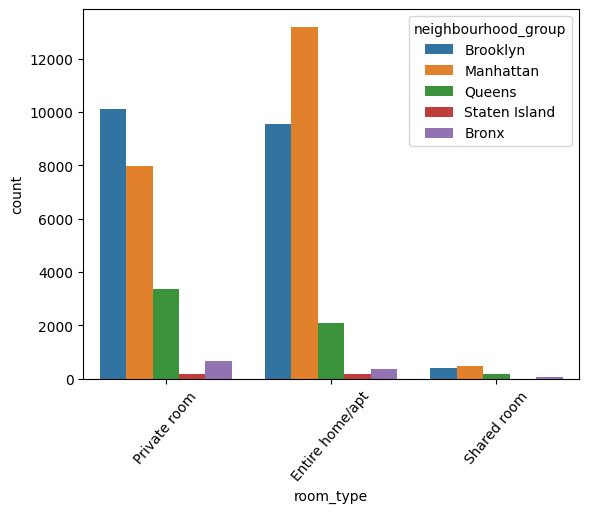

In [11]:
sns.countplot(data=datos_c,x="room_type",hue="neighbourhood_group")
plt.xticks(rotation=50)
plt.show()

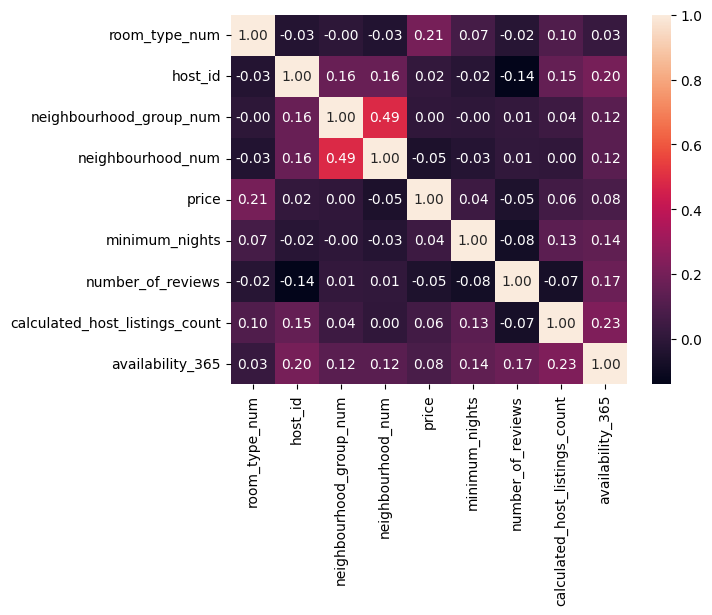

In [12]:
#anlisis numerico categorico

datos_c["room_type_num"]=pd.factorize(datos_c["room_type"])[0]
datos_c["neighbourhood_group_num"]=pd.factorize(datos_c["neighbourhood_group"])[0]
datos_c["neighbourhood_num"]=pd.factorize(datos_c["neighbourhood"])[0]
sns.heatmap(data=datos_c[["room_type_num","host_id","neighbourhood_group_num","neighbourhood_num","price","minimum_nights","number_of_reviews","calculated_host_listings_count","availability_365"]].corr(),annot=True,fmt=".2f")

plt.show()

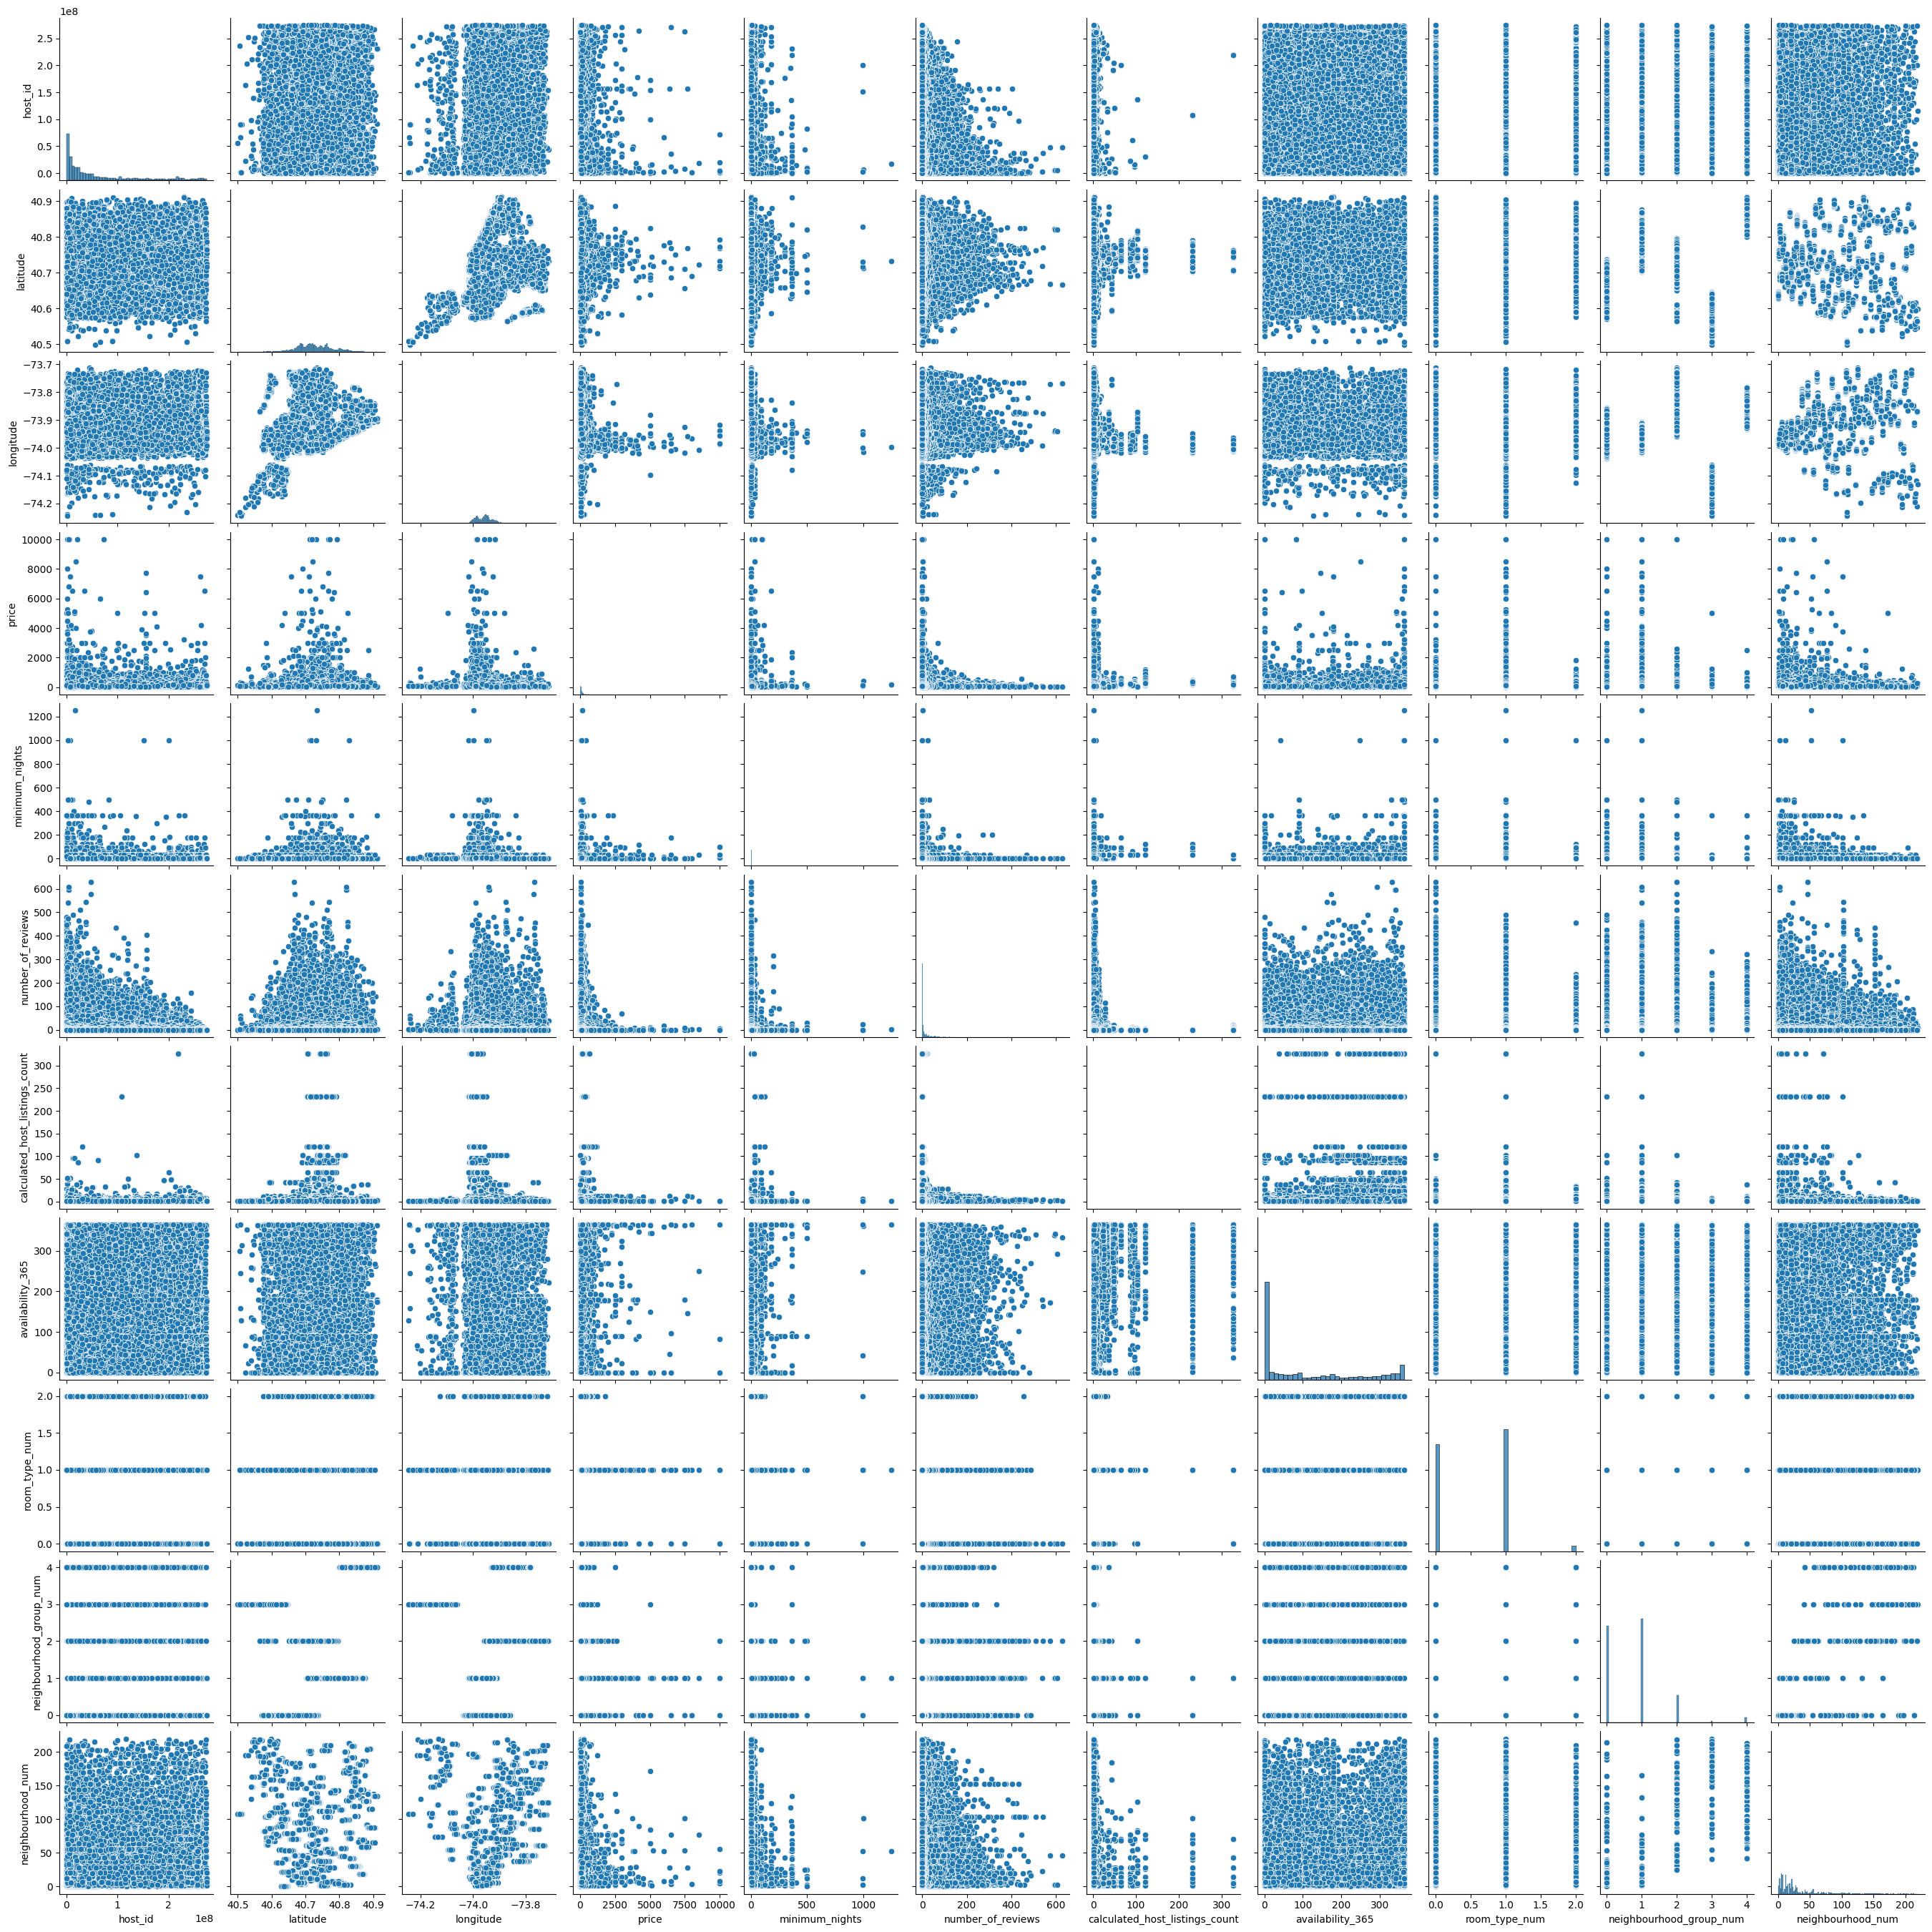

In [13]:
sns.pairplot(data=datos_c)

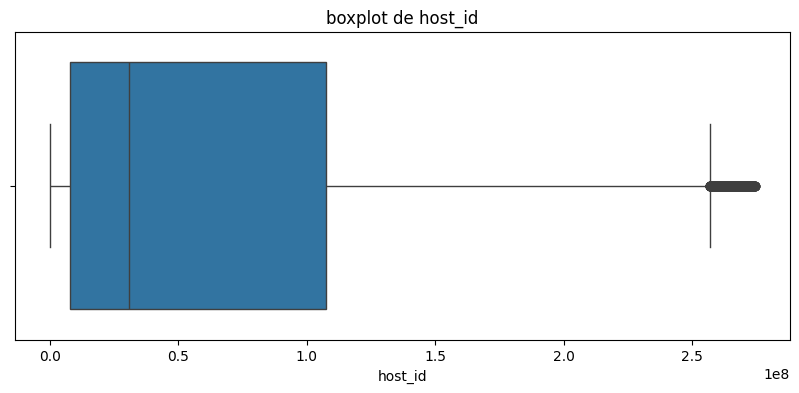

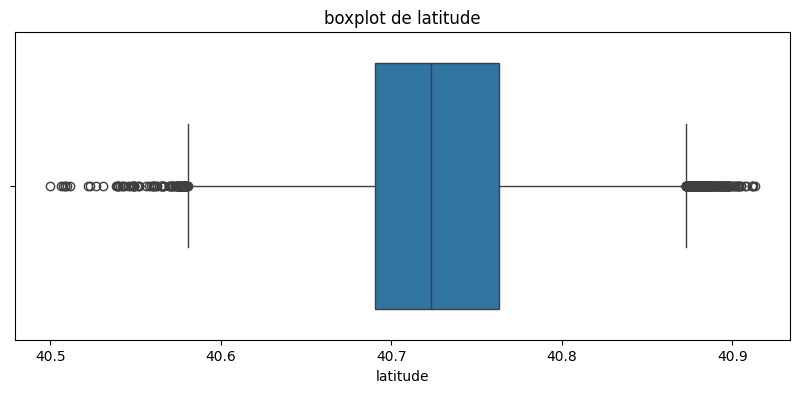

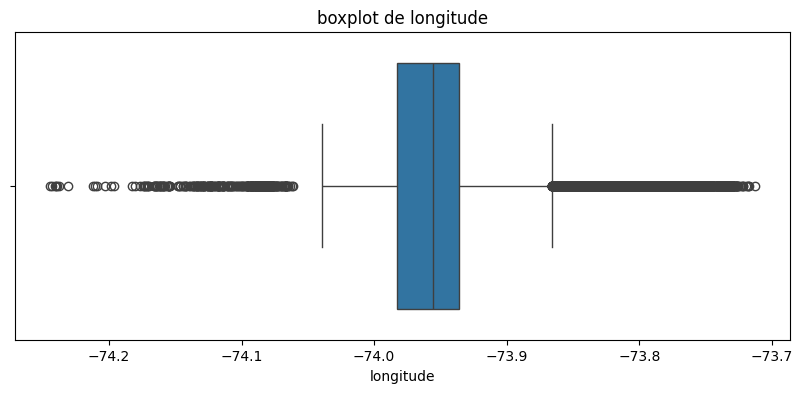

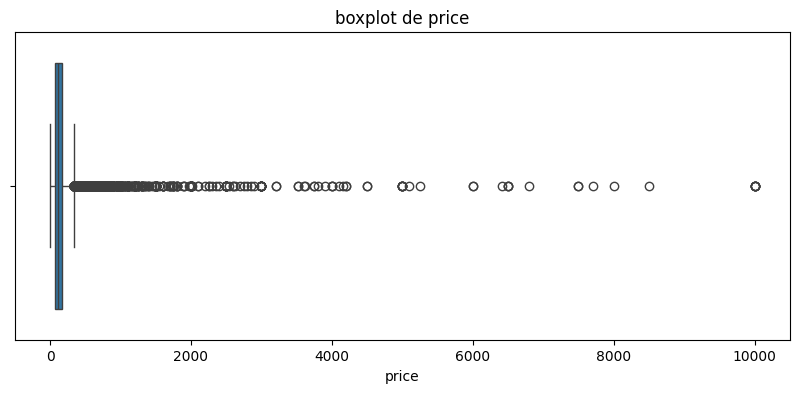

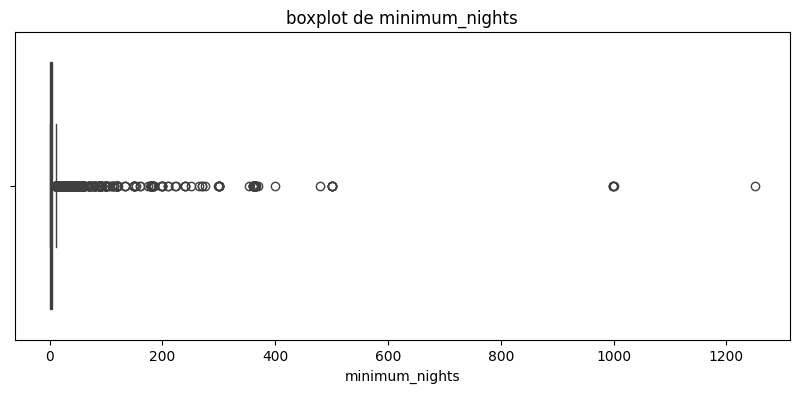

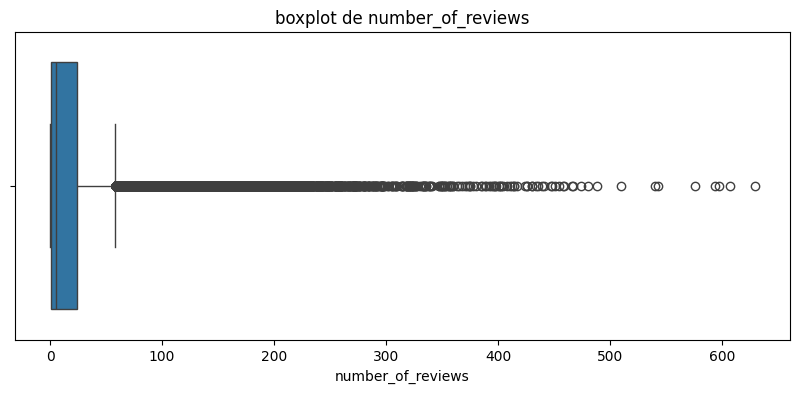

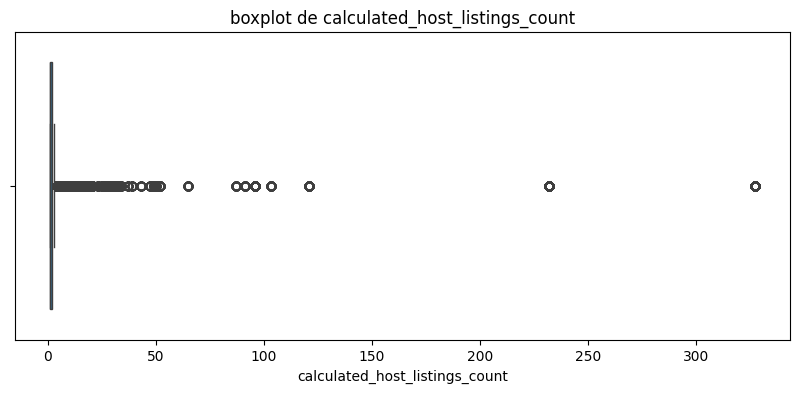

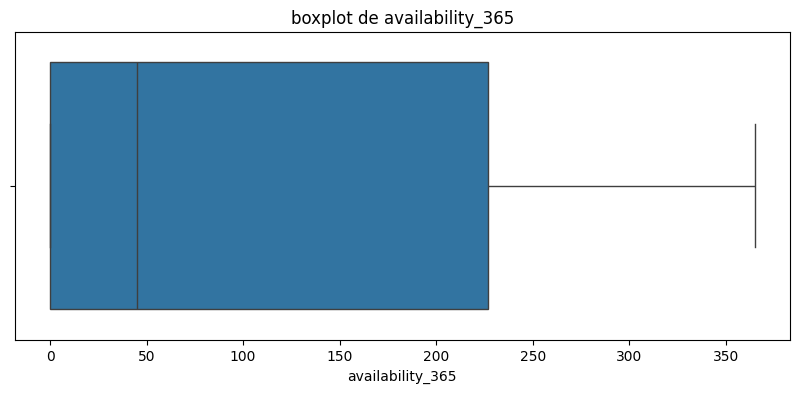

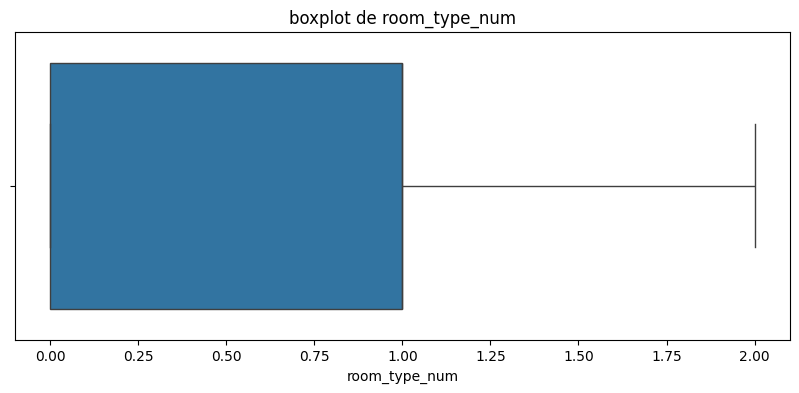

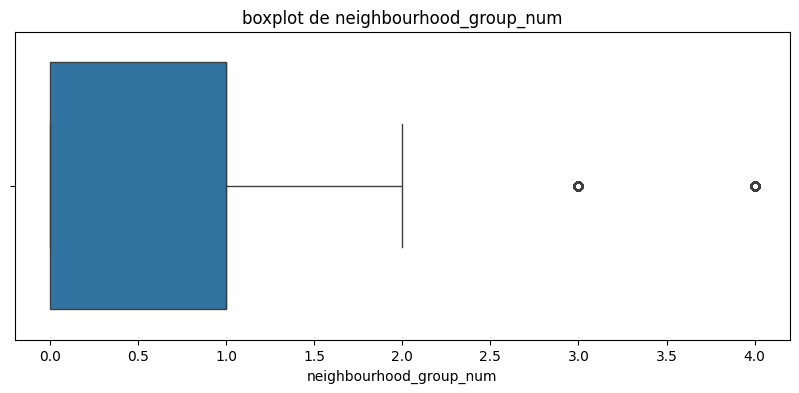

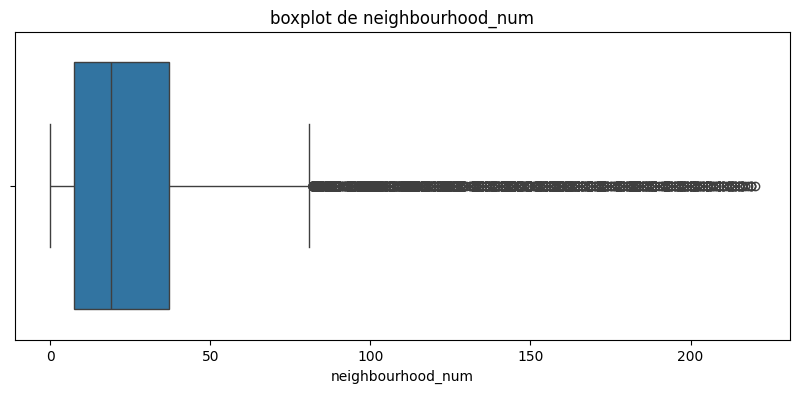

In [14]:
# ingenieria de caracteristicas 
# analisis de outliers con boxplot

for col in datos_c.select_dtypes(include=["float64","int64"]).columns:
    plt.figure(figsize=(10,4))
    sns.boxplot(data=datos_c,x=col)
    plt.title(f'boxplot de {col}')
    plt.show()

In [15]:
stats_noches=datos_c['minimum_nights'].describe()
stats_noches
#se nota que hay datos muy alejados de la media

count    48895.000000
mean         7.029962
std         20.510550
min          1.000000
25%          1.000000
50%          3.000000
75%          5.000000
max       1250.000000
Name: minimum_nights, dtype: float64

In [16]:
#se calcula el rango intercuartilico
iqr_nights=stats_noches["75%"]-stats_noches["25%"]
lower_bound=stats_noches["75%"]-1.5*iqr_nights
upper_bound=stats_noches["75%"]+1.5*iqr_nights
print(f'lowerbound:{lower_bound} upper boun:{upper_bound}')

lowerbound:-1.0 upper boun:11.0


In [17]:
datos_c=datos_c[datos_c["minimum_nights"]<= upper_bound]
datos_c.info()

<class 'pandas.core.frame.DataFrame'>
Index: 42288 entries, 0 to 48894
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   host_id                         42288 non-null  int64  
 1   neighbourhood_group             42288 non-null  object 
 2   neighbourhood                   42288 non-null  object 
 3   latitude                        42288 non-null  float64
 4   longitude                       42288 non-null  float64
 5   room_type                       42288 non-null  object 
 6   price                           42288 non-null  int64  
 7   minimum_nights                  42288 non-null  int64  
 8   number_of_reviews               42288 non-null  int64  
 9   calculated_host_listings_count  42288 non-null  int64  
 10  availability_365                42288 non-null  int64  
 11  room_type_num                   42288 non-null  int64  
 12  neighbourhood_group_num         42288

In [18]:
#analisis de valores faltantes
datos_c.isnull().sum()

host_id                           0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
calculated_host_listings_count    0
availability_365                  0
room_type_num                     0
neighbourhood_group_num           0
neighbourhood_num                 0
dtype: int64

In [19]:
#escalar variables
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
X_total=datos_c.drop(columns=["price"])
X = X_total.select_dtypes(include=["float64","int64"])
y=datos_c["price"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
scaler=MinMaxScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.fit_transform(X_test)
X_train_scaled=pd.DataFrame(X_train_scaled,columns=X_train.columns)
X_test_scaled=pd.DataFrame(X_test_scaled,columns=X_test.columns)


X_train_scaled.head()

,host_id,latitude,longitude,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,room_type_num,neighbourhood_group_num,neighbourhood_num
0,0.037706,0.625185,0.611501,0.4,0.000000,0.0,0.000000,0.5,0.50,0.254545
1,0.501861,0.488397,0.606232,0.1,0.131955,0.0,0.526027,1.0,0.00,0.095455
2,0.005460,0.522612,0.546337,0.9,0.000000,0.0,0.000000,0.5,0.00,0.054545
3,0.941415,0.687759,0.550232,0.4,0.004769,0.0,0.369863,0.5,0.25,0.127273
4,0.118764,0.334866,0.423838,0.2,0.001590,0.0,0.000000,0.0,0.00,0.359091


In [21]:
#seleccion de caracteristicas
from sklearn.feature_selection import SelectKBest,chi2
selector=SelectKBest (score_func=chi2,k=5)
X_train_selected=selector.fit_transform(X_train_scaled,y_train)
X_test_selected=selector.transform(X_test_scaled)
X_train_selected=pd.DataFrame(X_train_selected,columns=X_train.columns[selector.get_support()])
X_test_selected=pd.DataFrame(X_test_selected,columns=X_test.columns[selector.get_support()])
X_train_selected.head()

,host_id,calculated_host_listings_count,availability_365,room_type_num,neighbourhood_num
0,0.037706,0.0,0.000000,0.5,0.254545
1,0.501861,0.0,0.526027,1.0,0.095455
2,0.005460,0.0,0.000000,0.5,0.054545
3,0.941415,0.0,0.369863,0.5,0.127273
4,0.118764,0.0,0.000000,0.0,0.359091


In [22]:
X_train_selected["price"]=list(y_train)
X_test_selected["price"]=list(y_test)
X_train_selected.to_csv("../data/processed/train_selected.csv",index=False)
X_test_selected.to_csv("../data/processed/test_selected.csv",index=False)